In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
from utils import utils

In [2]:
def convolve_im(im: np.array,
                fft_kernel: np.array,
                title: str = "",
                verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        title: str
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """

    # Translate im to frequency domain by taking fourier transform
    im_fft = np.fft.fft2(im)
    # Multiply with fft kernel for getting the convoluted image
    conv_im_fft = im_fft * fft_kernel
    # Take inverse fourier transform for translating back to the spatial domain
    conv_result = np.real(np.fft.ifft2(conv_im_fft))

    if verbose:
        # For illustration purposes, we have to shift and take abs for the magnitude.
        # We also need to take the log for some of them, else it only displays a black frame
        im_fft = np.log(np.abs(np.fft.fftshift((im_fft))))
        fft_kernel = np.abs(np.fft.fftshift(fft_kernel))
        conv_im_fft = np.log(np.abs(np.fft.fftshift((conv_im_fft))))

        # Define figure
        fig, ax = plt.subplots(nrows=1, ncols=5)
        if title:
            fig.suptitle(title, fontsize=16)
        for axis in ax.ravel(): 
            axis.set_axis_off()
        fig.set_size_inches((20,4))
        # Remember to use cmap=gray!
        
        # Visualize original image
        ax[0].set_title("Original image")
        ax[0].imshow(im, cmap="gray")
        
        # Visualize FFT
        ax[1].set_title("FFT of image")
        ax[1].imshow(im_fft, cmap="gray")
        
        # Visualize FFT kernel
        ax[2].set_title("FFT kernel")
        ax[2].imshow(fft_kernel, cmap="gray")

        # Visualize filtered FFT image
        ax[3].set_title("FFT multiplication / convolution")
        ax[3].imshow(conv_im_fft, cmap="gray")
        
        # Visualize filtered spatial image
        ax[4].set_title("Filtered spatial image")
        ax[4].imshow(conv_result, cmap="gray")

    return conv_result

/Users/martinjohannesnilsen/OneDrive - NTNU/Fag/Datateknologi 1. semester/TDT4195 - Grunnleggende visuell databehandling/image processing/assignment2/src/utils/utils.py:129: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  rr, cc = skimage.draw.circle(center_row, center_col, radius)
/var/folders/r9/5r0c_f5s0kg0m5r4rcpytjpw0000gn/T/ipykernel_26016/2381619823.py:32: RuntimeWarning: divide by zero encountered in log
  conv_im_fft = np.log(np.abs(np.fft.fftshift((conv_im_fft))))


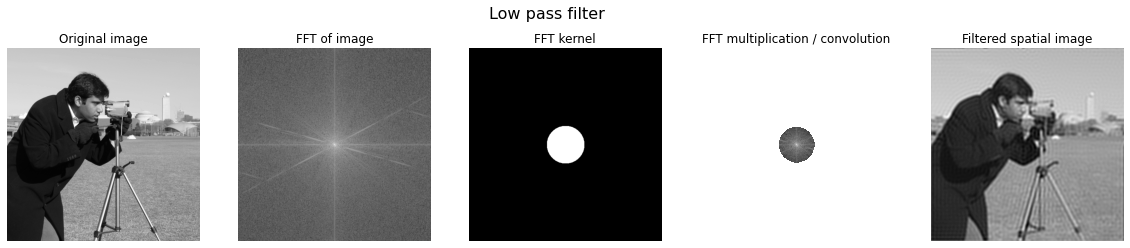

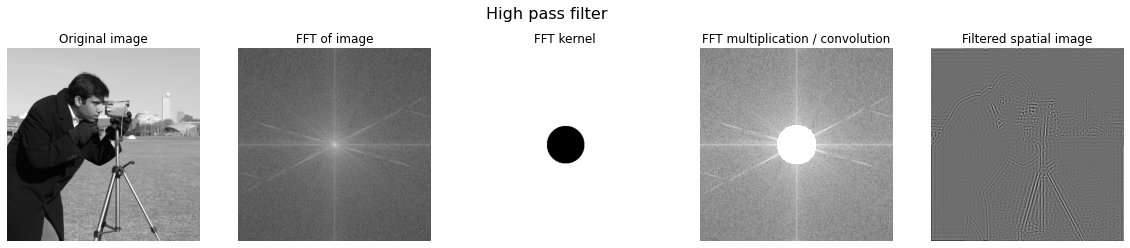

/Users/martinjohannesnilsen/OneDrive - NTNU/Fag/Datateknologi 1. semester/TDT4195 - Grunnleggende visuell databehandling/image processing/assignment2/src/utils/utils.py:81: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


Saving image to: data/results/task4a_camera_low_pass.png
Saving image to: data/results/task4a_camera_high_pass.png


In [3]:
if __name__ == "__main__":
    verbose = True
    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)
    # DO NOT CHANGE
    frequency_kernel_low_pass = utils.create_low_pass_frequency_kernel(im, radius=50)
    image_low_pass = convolve_im(im, frequency_kernel_low_pass,
                                    verbose=verbose, title="Low pass filter")
    # DO NOT CHANGE
    frequency_kernel_high_pass = utils.create_high_pass_frequency_kernel(im, radius=50)
    image_high_pass = convolve_im(im, frequency_kernel_high_pass,
                                    verbose=verbose, title="High pass filter")

    if verbose:
        plt.show()

    utils.save_im("task4a_camera_low_pass.png", image_low_pass)
    utils.save_im("task4a_camera_high_pass.png", image_high_pass)